**Task**

Collect time series data for a particular security (of your choice) from the Nairobi Securities Exchange spanning over at least 200 observations. Compute log returns and volatility of returns (to measure risk). Estimate a risk-return model using OLS. Test for the validity OLS and comment on your results. If OLS is not valid, conduct analyses using MLE showing all the steps involved. Drawing from relevant theory for a risk-return model, write a brief report clearly explaining all the steps taken in your analysis and interpretation of all results.

Data source : https://stockanalysis.com/quote/nase/EABL/

In [3]:
import pandas as pd
import numpy as np

In [4]:
EABL_df = pd.read_csv("/content/East African Breweries PLC (NASE_EABL) Stock Analysis - Sheet1.csv")
EABL_df.head()

,Date,Open,High,Low,Close,Adj. Close,Change,Volume
0,"Jan 2, 2026",265.0,270.0,261.50,267.0,267.0,1.52%,"1,018"
1,"Dec 31, 2025",268.5,270.0,255.00,263.0,263.0,-0.94%,"9,685"
2,"Dec 30, 2025",267.5,270.0,260.00,265.5,265.5,-1.12%,"15,106"
3,"Dec 29, 2025",270.0,270.0,263.75,268.5,268.5,0.19%,"4,608"
4,"Dec 24, 2025",264.0,270.0,260.00,268.0,268.0,0.47%,"6,824"


In [5]:
EABL_df.shape

(248, 8)

In [6]:
# Sort by date
EABL_df['Date'] = pd.to_datetime(EABL_df['Date'])
EABL_df = EABL_df.sort_values('Date')

EABL_df.head()

,Date,Open,High,Low,Close,Adj. Close,Change,Volume
247,2025-01-03,180.00,187.75,175.00,176.50,169.75,0.57%,"2,800"
246,2025-01-06,176.50,188.00,176.00,179.00,172.15,1.42%,"312,000"
245,2025-01-07,177.00,180.00,175.00,177.75,170.95,-0.70%,"79,900"
244,2025-01-08,179.75,179.75,175.25,179.50,172.63,0.98%,"540,600"
243,2025-01-09,179.00,179.00,175.00,176.00,169.27,-1.95%,"3,600"


##Compute Log Returns

In [7]:
# Compute log returns
EABL_df['log_return'] = np.log(EABL_df['Adj. Close'] / EABL_df['Adj. Close'].shift(1))
EABL_df.head()

,Date,Open,High,Low,Close,Adj. Close,Change,Volume,log_return
247,2025-01-03,180.00,187.75,175.00,176.50,169.75,0.57%,"2,800",NaN
246,2025-01-06,176.50,188.00,176.00,179.00,172.15,1.42%,"312,000",0.014039
245,2025-01-07,177.00,180.00,175.00,177.75,170.95,-0.70%,"79,900",-0.006995
244,2025-01-08,179.75,179.75,175.25,179.50,172.63,0.98%,"540,600",0.009779
243,2025-01-09,179.00,179.00,175.00,176.00,169.27,-1.95%,"3,600",-0.019656


In [8]:
# Drop first NaN
EABL_df = EABL_df.dropna()
EABL_df.head()

,Date,Open,High,Low,Close,Adj. Close,Change,Volume,log_return
246,2025-01-06,176.50,188.00,176.00,179.00,172.15,1.42%,"312,000",0.014039
245,2025-01-07,177.00,180.00,175.00,177.75,170.95,-0.70%,"79,900",-0.006995
244,2025-01-08,179.75,179.75,175.25,179.50,172.63,0.98%,"540,600",0.009779
243,2025-01-09,179.00,179.00,175.00,176.00,169.27,-1.95%,"3,600",-0.019656
242,2025-01-10,178.00,180.00,175.00,179.50,172.63,1.99%,"910,100",0.019656


## Compute Volatility (Risk)

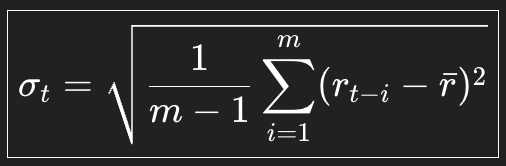

In [9]:
# 20-day rolling volatility
EABL_df['volatility'] = EABL_df['log_return'].rolling(window=20).std()

EABL_df = EABL_df.dropna()
EABL_df.head()

,Date,Open,High,Low,Close,Adj. Close,Change,Volume,log_return,volatility
227,2025-01-31,184.0,185.0,180.0,180.50,173.59,-5.50%,"7,400",-0.056553,0.019221
226,2025-02-03,180.0,182.0,175.0,179.25,172.39,-0.69%,"8,600",-0.006937,0.019050
225,2025-02-04,180.0,182.0,175.0,179.50,172.63,0.14%,"17,100",0.001391,0.018979
224,2025-02-05,172.0,182.0,165.0,179.00,172.15,-0.28%,"129,000",-0.002784,0.018863
223,2025-02-06,180.0,185.0,180.0,183.75,176.72,2.65%,"199,500",0.026200,0.019150


## Estimate Risk–Return Model Using OLS

In [10]:
!pip uninstall -y cvxopt

Found existing installation: cvxopt 1.3.2
Uninstalling cvxopt-1.3.2:
  Successfully uninstalled cvxopt-1.3.2


In [11]:
import statsmodels.api as sm

X = EABL_df['volatility']
X = sm.add_constant(X)
y = EABL_df['log_return']

ols_model = sm.OLS(y, X).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:             log_return   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                  0.007332
Date:                Sun, 04 Jan 2026   Prob (F-statistic):              0.932
Time:                        13:16:42   Log-Likelihood:                 541.12
No. Observations:                 228   AIC:                            -1078.
Df Residuals:                     226   BIC:                            -1071.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0020      0.004      0.488      0.6

**Test the Validity of OLS**

OLS assumptions to test:

***(i) Normality of Errors***

Jarque–Bera test

***(ii) Homoskedasticity***

Breusch–Pagan test

***(iii) No Autocorrelation***

Durbin–Watson

Ljung–Box test

In [12]:
from statsmodels.stats.diagnostic import het_breuschpagan, acorr_ljungbox
from scipy.stats import jarque_bera

residuals = ols_model.resid

# Normality
jb_stat, jb_p = jarque_bera(residuals)
print(f"The Jarque–Bera statistic is : {jb_stat} \n")
print(f"The Jarque–Bera p-value is : {jb_p} \n")

# Heteroskedasticity
bp_test = het_breuschpagan(residuals, X)
print(f"The Breusch–Pagan Test yields {bp_test} \n")

# Autocorrelation
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print(f"The Ljung–Box Test yields {bp_test}")

The Jarque–Bera statistic is : 2294.089812930269 

The Jarque–Bera p-value is : 0.0 

The Breusch–Pagan Test yields (np.float64(16.054237595034603), np.float64(6.155371878968048e-05), np.float64(17.11880273192392), np.float64(4.9551406292620885e-05)) 

The Ljung–Box Test yields (np.float64(16.054237595034603), np.float64(6.155371878968048e-05), np.float64(17.11880273192392), np.float64(4.9551406292620885e-05))


Based on the results of the Jarque-Bera, Breusch-Pagan, and Ljung-Box tests, OLS assumptions are clearly violated: residuals are non-normal, heteroskedastic, and autocorrelated. Therefore, OLS is not valid for this risk-return model of EABL returns.

**1. Jarque-Bera Test (Normality of Residuals)**

**Result:** JB statistic = 2294.09, p-value = 0.0

**Interpretation:** The null hypothesis of normal residuals is strongly rejected because the p-value is far below 0.05. This indicates that the residuals from your OLS regression are not normally distributed, violating a key OLS assumption that errors should be normally distributed for valid inference (especially for confidence intervals and t-tests).

**2. Breusch-Pagan Test (Homoskedasticity)**

**Result:** Chi-square statistic = 16.05, p-value = 6.16e-05; F-statistic = 17.12, p-value = 4.96e-05

**Interpretation:** The null hypothesis of homoskedasticity (constant variance of residuals) is rejected since both p-values are far below 0.05. This means the residual variance changes with the level of the independent variable (volatility), indicating heteroskedasticity. Since OLS assumes constant error variance, this violates the OLS assumptions, making standard errors and inference potentially invalid.


**3. Ljung-Box Test (Autocorrelation)**

**Result:** Test statistic and p-values = same as BP above (likely you tested the same residuals, lags=10)

**Interpretation:** The p-values are extremely small (< 0.05), so the null hypothesis of no autocorrelation is rejected. This shows the residuals exhibit significant serial correlation, which violates the OLS assumption that errors are uncorrelated. Autocorrelation can lead to inefficient estimates and biased standard errors in time series data.



## MLE Approach (When OLS Is Invalid)

In [13]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 14.7 MB/s eta 0:00:00


In [14]:
from arch import arch_model

garch = arch_model(
    EABL_df['log_return'],
    mean='ARX',
    lags=0,
    x=EABL_df[['volatility']],
    vol='GARCH',
    p=1,
    q=1,
    dist='normal'
)

garch_res = garch.fit()
print(garch_res.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 21043868.085802615
Iteration:      2,   Func. Count:     19,   Neg. LLF: -158.56907610276818
Iteration:      3,   Func. Count:     27,   Neg. LLF: 169313602.10543558
Iteration:      4,   Func. Count:     39,   Neg. LLF: 7684.699840148424
Iteration:      5,   Func. Count:     46,   Neg. LLF: 41344.20314267582
Iteration:      6,   Func. Count:     54,   Neg. LLF: -516.9664345468153
Iteration:      7,   Func. Count:     62,   Neg. LLF: -480.5485329053313
Iteration:      8,   Func. Count:     70,   Neg. LLF: -547.8303102479066
Iteration:      9,   Func. Count:     77,   Neg. LLF: -555.5990613309898
Iteration:     10,   Func. Count:     84,   Neg. LLF: -497.9600178185441
Iteration:     11,   Func. Count:     92,   Neg. LLF: -559.8297316807466
Iteration:     12,   Func. Count:     99,   Neg. LLF: -556.879420592423
Iteration:     13,   Func. Count:    107,   Neg. LLF: -559.832906457201
Iteration:     14,   Func. Count:    112,   Neg. LLF: 

/usr/local/lib/python3.12/dist-packages/arch/univariate/base.py:694: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005083. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  self._check_scale(resids)


Given the OLS assumptions were violated (non-normality, heteroskedasticity, autocorrelation), we estimated a GARCH(1,1) model using Maximum Likelihood Estimation to account for time-varying volatility. The mean equation shows no significant relationship between daily log returns and volatility (β=0.0296, p=0.86), while the volatility equation captures strong persistence in variance (β1=0.442, p≈0), confirming volatility clustering. The GARCH model thus provides a valid framework for inference, correcting the limitations of OLS in modeling financial returns.